<a href="https://colab.research.google.com/github/Swapn2/Data-Science-Learnings/blob/main/Logistic_with_gradient_descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import make_classification
import numpy as np
x,y=make_classification(n_samples=100,n_features=2,n_informative=1,n_redundant=0,\
                      n_classes=2,n_clusters_per_class=1,random_state=41,hypercube=False,class_sep=20)

In [2]:
import matplotlib.pyplot as plt

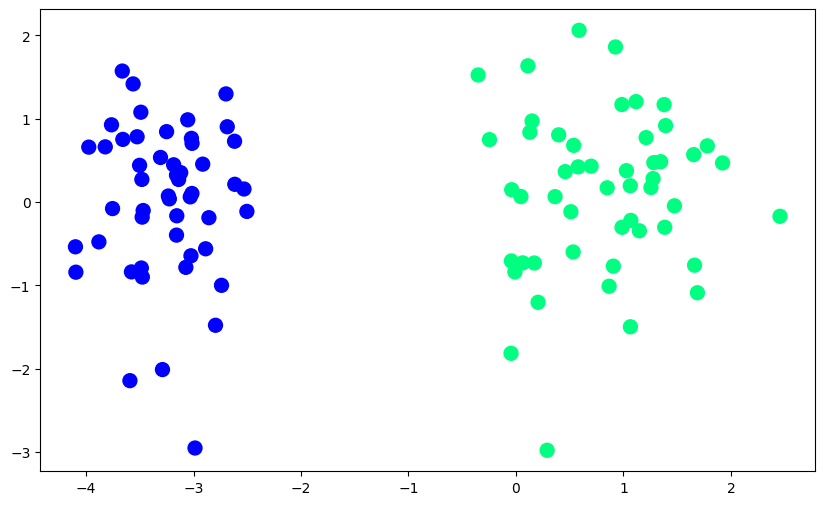

In [3]:
plt.figure(figsize=(10,6))
plt.scatter(x[:,0],x[:,1],c=y,cmap='winter',s=100)

In [4]:
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression(penalty=None,solver='sag')
lor.fit(x,y)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(penalty=None, solver='sag')

In [5]:
print(lor.coef_)
print(lor.intercept_)

[[4.77820978 0.20419051]]
[5.74835189]


In [8]:
m = -(lor.coef_[0][0]/lor.coef_[0][1])
b = -(lor.intercept_/lor.coef_[0][1])

In [11]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input+ b

In [ ]:
def gd(x,y):
